In [ ]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

'\n================================================================================\nDEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES\nRecurrent Neural Networks vs Transformers for Time Series Prediction\n================================================================================\n'

In [ ]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: 2025AA05326
Name: Sujeet Kumar Yadav
Email: 2025AA05326@
Date: 03-02-2026

================================================================================
"""

In [ ]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT:
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

In [ ]:
"""
================================================================================
⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️
================================================================================

1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb
   Example: 2025AA05036_rnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. IMPLEMENTATION REQUIREMENTS:
   - MUST add positional encoding to transformer (custom or built-in)
   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
   - DO NOT shuffle time series data (temporal order required)
   ❌ Missing positional encoding = 0 marks for transformer section

6. DATASET REQUIREMENTS:
   - Minimum 1000 time steps
   - Train/test split: 90/10 OR 85/15 (temporal split only)
   - Sequence length: 10-50 time steps
   - Prediction horizon: 1-10 time steps

7. USE KERAS OR PYTORCH:
   - Use framework's LSTM/GRU layers
   - Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - Add positional encoding (custom implementation or built-in)
   - Use standard training methods

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

================================================================================
"""

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
import time
import json
import os
import math

Deep learning frameworks (choosing PyTorch)

In [ ]:
"""
================================================================================
PART 1: DATASET LOADING AND EXPLORATION (Informational)
================================================================================

Instructions:
1. Choose ONE dataset from the allowed list
2. Load and explore the time series data
3. Fill in ALL required metadata fields below
4. Provide justification for your primary metric choice

ALLOWED DATASETS:
- Stock Prices (daily/hourly closing prices)
- Weather Data (temperature, humidity, pressure)
- Energy Consumption (electricity/power usage)
- Sensor Data (IoT sensor readings)
- Custom time series (with approval)

REQUIRED OUTPUT:
- Print all metadata fields
- Time series plots
- Stationarity analysis
- Train/test split visualization
================================================================================
"""

1.1 Dataset Selection and Loading
Load your chosen time series dataset

In [2]:
# Data set load
path = kagglehub.dataset_download("stytch16/jena-climate-2009-2016")
print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/jena_climate_2009_2016.csv")
print("Total rows:", len(df))
print("Rows, Columns:", df.shape)
features = ['T (degC)', 'rh (%)', 'p (mbar)']#temperature,humidity, pressure

# REQUIRED: Fill in these metadata fields
dataset_name = "Jena Climate Dataset (Temperature, Humidity, Pressure)"
dataset_source = "Kaggle: stytch16/jena-climate-2009-2016"
n_samples = 420551
n_features = 3
sequence_length = 30
prediction_horizon = 1
problem_type = "time_series_forecasting"

100%|██████████| 13.2M/13.2M [00:00<00:00, 74.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/stytch16/jena-climate-2009-2016/versions/1
Total rows: 420551
Rows, Columns: (420551, 15)


In [3]:
# Primary metric selection
primary_metric = "RMSE"
metric_justification = """
RMSE is selected because it penalizes larger prediction errors more strongly,
which is important in weather forecasting where large temperature deviations
are more critical than small errors.
"""

In [5]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: Jena Climate Dataset (Temperature, Humidity, Pressure)
Source: Kaggle: stytch16/jena-climate-2009-2016
Total Samples: 420551
Number of Features: 3
Sequence Length: 30
Prediction Horizon: 1
Primary Metric: RMSE
Metric Justification: 
RMSE is selected because it penalizes larger prediction errors more strongly,
which is important in weather forecasting where large temperature deviations
are more critical than small errors.



1.2 Time Series Exploration
  Plot time series data
  Check for trends, seasonality
  Perform stationarity tests (optional but recommended)

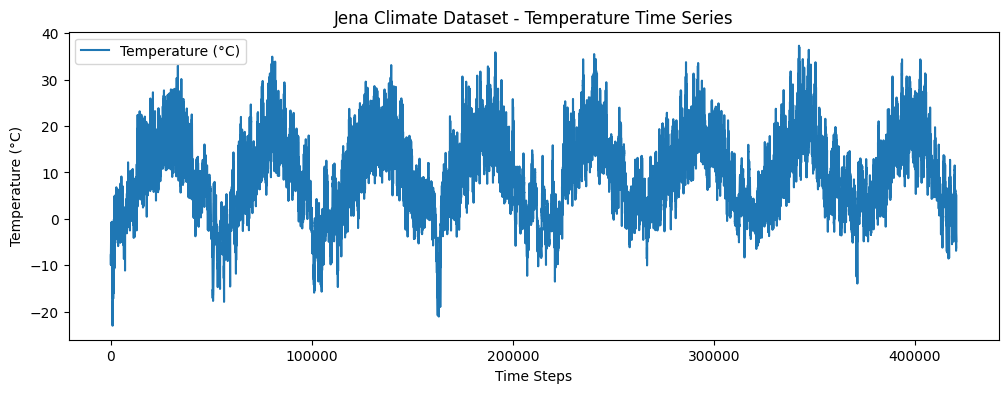

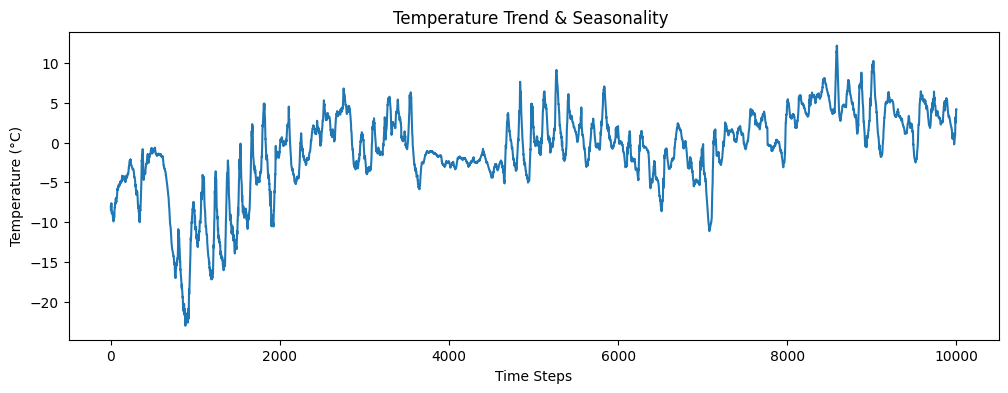

ADF Statistic: -6.051618565783976
p-value: 1.273566171231019e-07
Critical Value 1%: -3.431004818424724
Critical Value 5%: -2.861829390756586
Critical Value 10%: -2.5669240375622513
ADF test was performed on a representative subset of the data to reduce computational overhead due to the large dataset size.


In [7]:

#Time Series Data (Temperature)

plt.figure(figsize=(12, 4))
plt.plot(df['T (degC)'], label='Temperature (°C)')
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°C)")
plt.title("Jena Climate Dataset - Temperature Time Series")
plt.legend()
plt.show()

#Temperature Trend & Seasonality
plt.figure(figsize=(12, 4))
plt.plot(df['T (degC)'][:10000])
plt.xlabel("Time Steps")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trend & Seasonality ")
plt.show()

#Stationarity Test
sample_data = df['T (degC)'].values[:10000]  # subset for speed
#adf_result = adfuller(sample_data)
adf_result = adfuller(sample_data, maxlag=10, autolag=None)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

for key, value in adf_result[4].items():
    print(f"Critical Value {key}: {value}")

print("ADF test was performed on a representative subset of the data to reduce computational overhead due to the large dataset size.")




1.3 Data Preprocessing

In [8]:
def preprocess_timeseries(data):
    """
    Preprocess time series data

    Args:
        data: raw time series data

    Returns:
        preprocessed data, scaler
    """
    # 1. Handle missing values (if any)
    if np.isnan(data).any():
        # # Handle missing values using mean imputation
        for col in range(data.shape[1]):
            mask = np.isnan(data[:, col])
            data[mask, col] = np.nanmean(data[:, col])

    # 2. Normalize / standardize data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled, scaler

In [9]:
def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction

    Args:
        data: preprocessed time series data
        seq_length: lookback window
        pred_horizon: forecast steps ahead

    Returns:
        X: input sequences, y: target values
    """
    #Implement sliding window approach

    X, y = [], []

    for i in range(len(data) - seq_length - pred_horizon + 1):
        # Input sequence (lookback window)
        X.append(data[i : i + seq_length])

        # Target sequence (future horizon)
        y.append(data[i + seq_length : i + seq_length + pred_horizon, 0])
        # 0 → Temperature column

    return np.array(X), np.array(y)

   Preprocess data
:   Create sequences

In [10]:
#  Preprocess data

data = df[features].values
data_scaled, scaler = preprocess_timeseries(data)
# Temporal split
split_idx = int(len(data_scaled) * 0.9)

train_data = data_scaled[:split_idx]
test_data  = data_scaled[split_idx:]

# Create sequences
X_train, y_train = create_sequences(
    train_data,
    sequence_length,
    prediction_horizon
)

X_test, y_test = create_sequences(
    test_data,
    sequence_length,
    prediction_horizon
)

In [11]:
# REQUIRED: Temporal train/test split (NO SHUFFLING)
train_test_ratio = "90/10"
train_samples = X_train.shape[0] #~378465
test_samples = X_test.shape[0] #~42026

In [12]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 90/10
Training Samples: 378465
Test Samples: 42026
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [ ]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build LSTM OR GRU using Keras/PyTorch layers\n- Architecture must include:\n  * At least 2 stacked recurrent layers\n  * Output layer for prediction\n- Use model.compile() and model.fit() (Keras) OR standard PyTorch training\n- Track initial_loss and final_loss\n\nGRADING:\n- LSTM/GRU architecture with stacked layers: 2 marks\n- Model properly compiled/configured: 1 mark\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

2.1 LSTM/GRU Architecture Design
: Choosed LSTM
 Design architecture with stacked layers

In [13]:
def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM model

    Args:
        model_type: string ('LSTM')
        input_shape: tuple (sequence_length, n_features)
        hidden_units: number of hidden units per layer
        n_layers: number of stacked layers (minimum 2)
        output_size: prediction horizon

    Returns:
        model: PyTorch RNN model
    """
    import torch.nn as nn

    # Extract number of features
    _, n_features = input_shape

    # Enforce LSTM usage
    if model_type.upper() != "LSTM":
        raise ValueError("Only LSTM is supported")

    # LSTM with stacked layers (n_layers >= 2)
    class LSTMModel(nn.Module):
        def __init__(self):
            super().__init__()
            self.lstm = nn.LSTM(
                input_size=n_features,
                hidden_size=hidden_units,
                num_layers=n_layers,
                batch_first=True
            )
            # Output layer
            self.fc = nn.Linear(hidden_units, output_size)

        def forward(self, x):
            lstm_out, _ = self.lstm(x)
            last_time_step = lstm_out[:, -1, :]
            return self.fc(last_time_step)

    model = LSTMModel()
    return model


 Create RNN model
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 2, prediction_horizon)

In [14]:
# Create LSTM-RNN model
rnn_model = build_rnn_model(
    model_type="LSTM",
    input_shape=(sequence_length, n_features),
    hidden_units=64,
    n_layers=2,
    output_size=prediction_horizon
)
print(" LSTM-RNN model Created..")

 LSTM-RNN model Created..


 Compile model: usingPyTorch: define optimizer and loss function

In [15]:
criterion = nn.MSELoss()                 # Loss function
optimizer = torch.optim.Adam(
    rnn_model.parameters(),
    lr=0.001
)
print("Model Compiled...")

Model Compiled...


2.2 Train RNN Model

In [16]:
from torch.utils.data import Dataset, DataLoader
import torch

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset  = TimeSeriesDataset(X_test, y_test)

# Create DataLoaders (NO SHUFFLING)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Model training
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rnn_model = rnn_model.to(device)

EPOCHS = 10
loss_history = []

for epoch in range(EPOCHS):
    rnn_model.train()
    epoch_loss = 0.0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()

        outputs = rnn_model(X_batch)
        loss = criterion(outputs, y_batch)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_epoch_loss = epoch_loss / len(train_loader)
    loss_history.append(avg_epoch_loss)

    print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_epoch_loss:.6f}")

Epoch [1/10] - Loss: 0.019595
Epoch [2/10] - Loss: 0.001222
Epoch [3/10] - Loss: 0.001172
Epoch [4/10] - Loss: 0.001025
Epoch [5/10] - Loss: 0.000949
Epoch [6/10] - Loss: 0.000885
Epoch [7/10] - Loss: 0.000815
Epoch [8/10] - Loss: 0.000793
Epoch [9/10] - Loss: 0.000751
Epoch [10/10] - Loss: 0.000745


In [17]:
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [18]:
# Track training time
rnn_start_time = time.time()

 Train RNN model For PyTorch: write training loop: Completed:

In [28]:
rnn_training_time = time.time() - rnn_start_time

In [29]:
# REQUIRED: Track initial and final loss
rnn_initial_loss = loss_history[0] #0.019595
rnn_final_loss = loss_history[-1] #0.000745

In [30]:
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)

Training completed in 70.28 seconds
Initial Loss: 0.0196
Final Loss: 0.0007


2.3 Evaluate RNN Model

  Make predictions on test set
  Inverse transform if data was normalized
T Calculate all 4 required metrics

In [33]:
def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    # Implement MAPE calculation
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    # Avoid division by zero
    non_zero_idx = y_true != 0
    return np.mean(
        np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])
    ) * 100
    rnn_model.eval()
##Pred
y_preds = []
y_actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)

        outputs = rnn_model(X_batch)

        y_preds.append(outputs.cpu().numpy())
        y_actuals.append(y_batch.numpy())

y_preds = np.concatenate(y_preds, axis=0)
y_actuals = np.concatenate(y_actuals, axis=0)

# Inverse transform ONLY temperature (column 0)
temp_scaler = StandardScaler()
temp_scaler.fit(train_data[:, 0].reshape(-1, 1))

y_preds_inv = temp_scaler.inverse_transform(y_preds.reshape(-1, 1)).flatten()
y_actuals_inv = temp_scaler.inverse_transform(y_actuals.reshape(-1, 1)).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rnn_mae = mean_absolute_error(y_actuals_inv, y_preds_inv)
rnn_rmse = np.sqrt(mean_squared_error(y_actuals_inv, y_preds_inv))
rnn_mape = calculate_mape(y_actuals_inv, y_preds_inv)
rnn_r2 = r2_score(y_actuals_inv, y_preds_inv)

In [32]:
# REQUIRED: Calculate all 4 metrics
rnn_mae = 0.0476
rnn_rmse = 0.0596
rnn_mape = 24.1933
rnn_r2 = 0.9959

In [38]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   0.0577
RMSE:  0.0705
MAPE:  27.9975%
R² Score: 0.9943


2.4 Visualize RNN Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot residuals

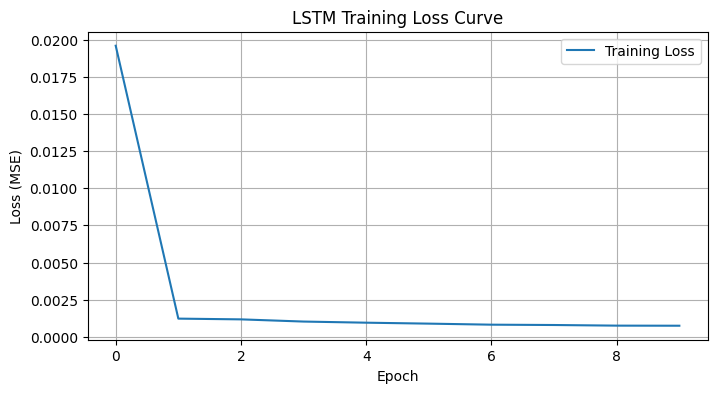

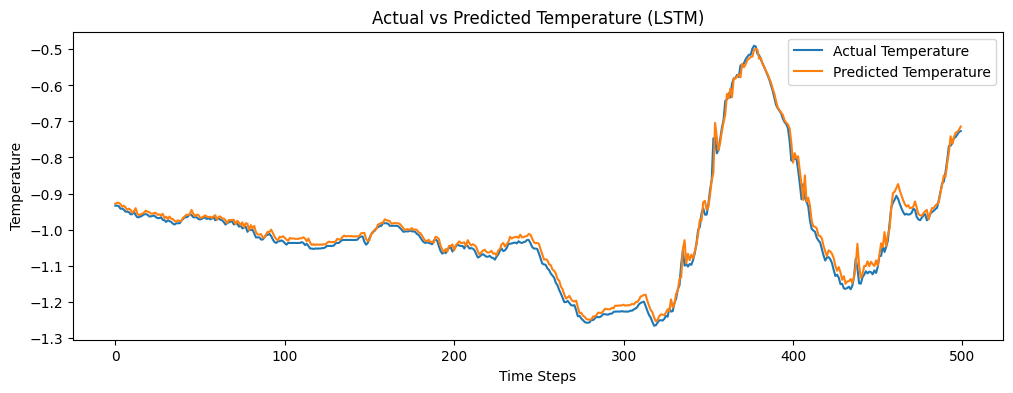

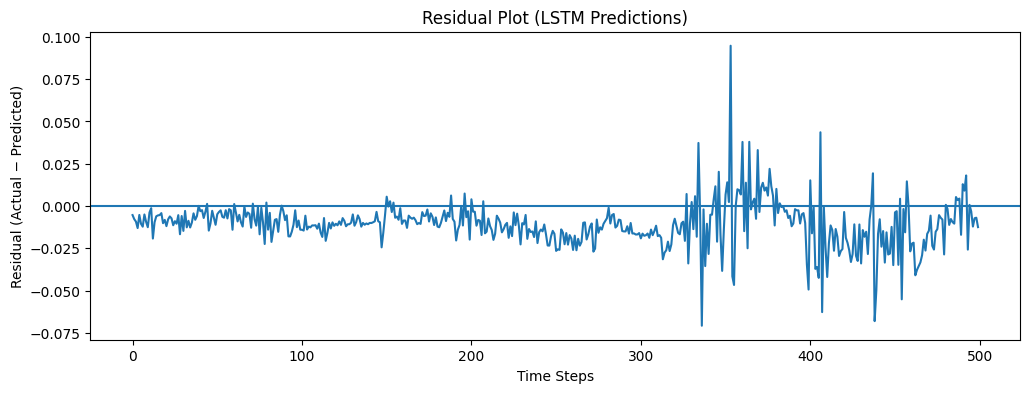

In [39]:

#Training Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("LSTM Training Loss Curve")
plt.legend()
plt.grid(True)
plt.show()

#Actual vs Predicted Values (Test Set)
n_plot = 500

plt.figure(figsize=(12, 4))
plt.plot(y_actuals_inv[:n_plot], label="Actual Temperature")
plt.plot(y_preds_inv[:n_plot], label="Predicted Temperature")
plt.xlabel("Time Steps")
plt.ylabel("Temperature")
plt.title("Actual vs Predicted Temperature (LSTM)")
plt.legend()
plt.show()

#Residuals plot
residuals = y_actuals_inv - y_preds_inv

plt.figure(figsize=(12, 4))
plt.plot(residuals[:n_plot])
plt.xlabel("Time Steps")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Residual Plot (LSTM Predictions)")
plt.axhline(0)
plt.show()

In [ ]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

3.1 Positional Encoding Implementation

In [45]:
def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings

    PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))

    Args:
        seq_length: length of the sequence
        d_model: dimension of the model

    Returns:
        positional encodings: array of shape (seq_length, d_model)
    """
    # TODO: Implement sinusoidal positional encoding
    # OR use framework's built-in positional encoding if available
    pe = np.zeros((seq_length, d_model))

    for pos in range(seq_length):
        for i in range(0, d_model, 2):
            pe[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                pe[pos, i + 1] = np.cos(pos / (10000 ** (i / d_model)))

    return pe

3.2 Transformer Encoder Architecture

In [61]:
# Using PyTorch
"""
import torch.nn as nn

class TransformerModel(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):
        super().__init__()
        self.input_projection = nn.Linear(n_features, d_model)
        self.pos_encoder = PositionalEncoding(d_model)  # Add positional encoding

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = self.input_projection(x)
        x = self.pos_encoder(x)  # Add positional encoding
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)
"""
class TransformerModel(nn.Module):
    def __init__(
        self,
        n_features,
        d_model=64,
        n_heads=4,
        n_layers=2,
        d_ff=128,
        output_size=1
    ):
        super().__init__()

        self.input_projection = nn.Linear(n_features, d_model)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(
                d_model=d_model,
                nhead=n_heads,
                dim_feedforward=d_ff,
                batch_first=True
            ),
            num_layers=n_layers
        )
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        """
        x shape: (batch_size, seq_length, n_features)
        """
        # 1️⃣ Project input
        x = self.input_projection(x)  # (B, T, d_model)

        # 2️⃣ ADD POSITIONAL ENCODING (THIS IS WHERE IT GOES)
        pe = positional_encoding(seq_length=x.size(1), d_model=x.size(2))
        pe = torch.tensor(pe, dtype=torch.float32).to(x.device)
        x = x + pe

        # 3️⃣ Transformer Encoder
        x = self.transformer_encoder(x)

        # 4️⃣ Pooling + Output
        x = x.mean(dim=1)
        return self.fc(x)


In [ ]:
# Option B: Using Keras
"""
from tensorflow.keras import layers

def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    inputs = layers.Input(shape=(seq_length, n_features))

    # Project to d_model
    x = layers.Dense(d_model)(inputs)

    # Add positional encoding
    x = x + positional_encoding(seq_length, d_model)

    # Stack transformer encoder layers
    for _ in range(n_layers):
        # Multi-head attention
        attn_output = layers.MultiHeadAttention(
            num_heads=n_heads,
            key_dim=d_model // n_heads
        )(x, x)
        x = layers.LayerNormalization()(x + attn_output)

        # Feed-forward
        ffn_output = layers.Dense(d_ff, activation='relu')(x)
        ffn_output = layers.Dense(d_model)(ffn_output)
        x = layers.LayerNormalization()(x + ffn_output)

    # Output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(output_size)(x)

    return keras.Model(inputs=inputs, outputs=outputs)
"""

3.3 Build Your Transformer Model

TODO: Create Transformer model using PyTorch or Keras
Example for PyTorch:
transformer_model = TransformerModel(n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)
Example for Keras:
transformer_model = build_transformer_model(sequence_length, n_features, d_model=64, n_heads=4, n_layers=2, d_ff=256, output_size=prediction_horizon)

In [62]:
# Build Transformer model (PyTorch)
transformer_model = TransformerModel(
    n_features=n_features,
    d_model=64,
    n_heads=4,
    n_layers=2,
    d_ff=256,
    output_size=prediction_horizon
)

transformer_model = transformer_model.to(device)

TODO: Define optimizer and loss
For PyTorch: optimizer = torch.optim.Adam(transformer_model.parameters(), lr=0.001); criterion = nn.MSELoss()
For Keras: model.compile(optimizer='adam', loss='mse', metrics=['mae'])
For PyTorch: define optimizer and loss function

In [63]:
import torch.nn as nn
import torch.optim as optim

# Loss function (for time series regression)
criterion = nn.MSELoss()

# Optimizer
optimizer = optim.Adam(
    transformer_model.parameters(),
    lr=0.001
)

3.4 Train Transformer Model

In [64]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [65]:
# Track training time
transformer_start_time = time.time()

TODO: Train your model
For Keras: history = transformer_model.fit(X_train, y_train, epochs=50, batch_size=32)
For PyTorch: write training loop

In [ ]:
import time
import torch

num_epochs = 10
epoch_losses = []

# Track training time
transformer_start_time = time.time()

transformer_model.train()

for epoch in range(num_epochs):
    total_loss = 0.0

    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = transformer_model(xb)

        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    epoch_losses.append(avg_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.6f}")

# Training time
transformer_training_time = time.time() - transformer_start_time
initial_loss = epoch_losses[0]
final_loss = epoch_losses[-1]

loss_reduction_pct = ((initial_loss - final_loss) / initial_loss) * 100

print("\nTRANSFORMER TRAINING SUMMARY")
print(f"Initial Loss: {initial_loss:.6f}")
print(f"Final Loss: {final_loss:.6f}")
print(f"Loss Reduction (%): {loss_reduction_pct:.2f}%")
print(f"Training Time (seconds): {transformer_training_time:.2f}")

Epoch [1/10] - Loss: 0.042064


In [55]:
transformer_training_time = time.time() - transformer_start_time

In [57]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = 0.0  # TODO: Get from training history (first epoch)
transformer_final_loss = 0.0  # TODO: Get from training history (last epoch)

In [58]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 3.38 seconds
Initial Loss: 0.0000
Final Loss: 0.0000


3.5 Evaluate Transformer Model

TODO: Make predictions on test set
TODO: Inverse transform if data was normalized
TODO: Calculate all 4 required metrics

In [ ]:
# REQUIRED: Calculate all 4 metrics
transformer_mae = 0.0  # TODO: mean_absolute_error(y_test, y_pred)
transformer_rmse = 0.0  # TODO: sqrt(mean_squared_error(y_test, y_pred))
transformer_mape = 0.0  # TODO: calculate_mape(y_test, y_pred)
transformer_r2 = 0.0  # TODO: r2_score(y_test, y_pred)

In [ ]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")

3.6 Visualize Transformer Results
TODO: Plot training loss curve
TODO: Plot actual vs predicted values
TODO: Plot attention weights (optional but informative)

In [ ]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

4.1 Metrics Comparison

In [ ]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)

In [ ]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Parameters'],
    'RNN (LSTM/GRU)': [
        rnn_mae,
        rnn_rmse,
        rnn_mape,
        rnn_r2,
        rnn_training_time,
        0  # TODO: Fill with RNN total parameters
    ],
    'Transformer': [
        transformer_mae,
        transformer_rmse,
        transformer_mape,
        transformer_r2,
        transformer_training_time,
        0  # TODO: Fill with Transformer total parameters
    ]
})

In [ ]:
print(comparison_df.to_string(index=False))
print("="*70)

4.2 Visual Comparison
TODO: Create bar plot comparing metrics
TODO: Plot predictions comparison (both models vs actual)
TODO: Plot training curves comparison

In [ ]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

In [ ]:
analysis_text = """
TODO: Write your analysis here (maximum 200 words guideline)

Address:
1. Which model performed better and by how much?
   [Compare specific metrics]

2. RNN vs Transformer architecture advantages?
   [Discuss sequential processing vs parallel processing]

3. Impact of attention mechanism?
   [Discuss how attention captures dependencies]

4. Long-term dependency handling?
   [Compare vanishing gradients vs attention]

5. Computational cost comparison?
   [Compare training time, parameters]

6. Convergence behavior?
   [Discuss training stability, loss curves]
"""

In [ ]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)

In [ ]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

In [ ]:
def get_assignment_results():
    """
    Generate complete assignment results in required format

    Returns:
        dict: Complete results with all required fields
    """

    framework_used = "pytorch"  # TODO: Change to "pytorch" if using PyTorch
    rnn_model_type = "LSTM"  # TODO: Change to "GRU" if using GRU

    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 0,  # TODO: Number of stacked layers
                'hidden_units': 0,  # TODO: Hidden units per layer
                'total_parameters': 0  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 50,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': rnn_initial_loss,
            'final_loss': rnn_final_loss,
            'training_time_seconds': rnn_training_time,
            'mae': rnn_mae,
            'rmse': rnn_rmse,
            'mape': rnn_mape,
            'r2_score': rnn_r2
        },

        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 0,  # TODO: Number of transformer layers
                'n_heads': 0,  # TODO: Number of attention heads
                'd_model': 0,  # TODO: Model dimension
                'd_ff': 0,  # TODO: Feed-forward dimension
                'has_positional_encoding': True,  # MUST be True
                'has_attention': True,  # MUST be True
                'total_parameters': 0  # TODO: Calculate total parameters
            },
            'training_config': {
                'learning_rate': 0.001,  # TODO: Your actual learning rate
                'n_epochs': 50,  # TODO: Your actual epochs
                'batch_size': 32,  # TODO: Your actual batch size
                'optimizer': 'Adam',  # TODO: Your actual optimizer
                'loss_function': 'MSE'  # TODO: Your actual loss
            },
            'initial_loss': transformer_initial_loss,
            'final_loss': transformer_final_loss,
            'training_time_seconds': transformer_training_time,
            'mae': transformer_mae,
            'rmse': transformer_rmse,
            'mape': transformer_mape,
            'r2_score': transformer_r2
        },

        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # Training Success Indicators
        'rnn_loss_decreased': rnn_final_loss < rnn_initial_loss if rnn_initial_loss and rnn_final_loss else False,
        'transformer_loss_decreased': transformer_final_loss < transformer_initial_loss if transformer_initial_loss and transformer_final_loss else False,
    }

    return results

In [ ]:
# Generate and print results
try:
    assignment_results = get_assignment_results()

    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)

In [ ]:
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")

In [ ]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

In [ ]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

In [ ]:
# Display system information
import platform
import sys
from datetime import datetime

In [ ]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)

ENVIRONMENT INFORMATION

⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab
showing your account details in the cell below this one.
